In [67]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 20;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 20
cphl = CPHL.CPHLSolver(N_sites, g_vals);

In [68]:
CPHL.SetUpHamiltonians(cphl);
OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)

λ = 0.5
cphl.OrgWeight = copy(λ)
cphl.OStringWeight = copy(λ)
CPHL.OptimizeCPDMRG(cphl);

LoadError: InterruptException:

In [ ]:
for i in 1:20
    CPHL.LearnHarmonics(cphl)

    @save "DATA/ALPHAMat_$(N_sites).jld2" ALPHAMat = copy(cphl.ALPHAMat)
    if cphl.flag_convegence
        println("Converged")
        break
    end
end

Current error = 0.09124725178533118; λ weight = 0.5
Current error = 0.07360497026624266; λ weight = 0.4166666666666667
Current error = 0.0905480194623852; λ weight = 0.35714285714285715
Current error = 0.07331890949653473; λ weight = 0.3125
Current error = 0.06276070044526; λ weight = 0.2777777777777778
Current error = 0.04759725947691936; λ weight = 0.25
Current error = 0.02019024592350147; λ weight = 0.22727272727272727
Current error = 0.018078567705700977; λ weight = 0.20833333333333331
Current error = 0.016375198635262846; λ weight = 0.1923076923076923
Current error = 0.015041444276429677; λ weight = 0.17857142857142858
Current error = 0.013952673611817939; λ weight = 0.16666666666666666
Current error = 0.013044421948032894; λ weight = 0.15625
Current error = 0.012290516224983184; λ weight = 0.14705882352941174
Current error = 0.011608831154469418; λ weight = 0.1388888888888889
Current error = 0.010980520917005708; λ weight = 0.13157894736842105
Current error = 0.010427443238810823

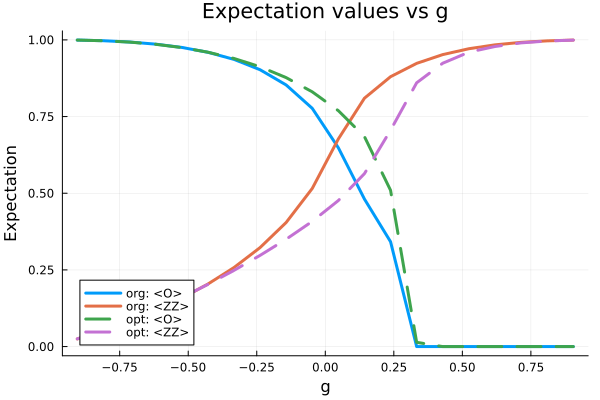

In [ ]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)

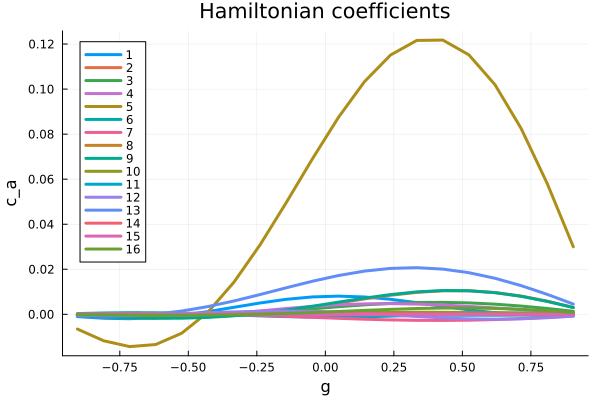

In [ ]:
l = plot(cphl.g_vals, cphl.CMat[:, 1], label="$(1)", title="Hamiltonian coefficients", xlabel="g", ylabel="c_a", linewidth=3);
for idx in 2:cphl.N_op
    plot!(l, cphl.g_vals, cphl.CMat[:, idx], label="$(idx)", linewidth=3)
end


display(l)